In [266]:
sub_list = ["sub-01","sub-02","sub-03",
            "sub-04","sub-05","sub-06",
            "sub-07","sub-08","sub-09",
            "sub-10","sub-11","sub-12",
            "sub-13","sub-15","sub-16",
            "sub-17","sub-18","sub-19",
            "sub-21","sub-22","sub-23",
            "sub-24","sub-25","sub-26",
            "sub-27","sub-28","sub-30",
            "sub-31","sub-32","sub-33",]

In [143]:
"""
lists of subjects above two seconds mean rt (16)
and below (14)
"""

sub_above = ['sub-01','sub-03','sub-05',
             'sub-06','sub-07','sub-08',
             'sub-10','sub-13','sub-16',
             'sub-17','sub-18','sub-23',
             'sub-24','sub-26','sub-30',
             'sub-31']

sub_below = ['sub-02','sub-04','sub-09',
             'sub-11','sub-12','sub-15',
             'sub-19','sub-21','sub-22',
             'sub-25','sub-27','sub-28',
             'sub-32','sub-33']


### checked visually on 20th dec 2023 that linear registration was done correctly and indeed aligns with atlas_resampled

In [452]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
import csv
from nilearn import datasets, image
from nilearn.signal import butterworth
from statsmodels.stats.multitest import multipletests
import matplotlib as mpl

## Filter confounds file

In [11]:
# from "Rest" part in Nialls file + additional four
columns_n = ['global_signal','global_signal_derivative1','global_signal_derivative1_power2',
           'global_signal_power2','csf', 'white_matter', 'tcompcor', 'cosine00', 'cosine01', 'cosine02',
           'cosine03', 'trans_x', 'trans_x_derivative1', 'trans_x_power2', 'trans_x_derivative1_power2',
           'trans_y', 'trans_y_derivative1', 'trans_y_derivative1_power2', 'trans_y_power2',
           'trans_z', 'trans_z_derivative1', 'trans_z_derivative1_power2', 'trans_z_power2',
           'rot_x', 'rot_x_derivative1', 'rot_x_power2', 'rot_x_derivative1_power2',
           'rot_y', 'rot_y_derivative1', 'rot_y_power2', 'rot_y_derivative1_power2',
           'rot_z', 'rot_z_derivative1','rot_z_derivative1_power2', 'rot_z_power2']

more_columns = ['t_comp_cor_00', 't_comp_cor_01', 't_comp_cor_02', 't_comp_cor_03']

columns = columns_n + more_columns
len(columns)

39

In [29]:
# filter confounds for each subject
pth = '/home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess'

for sub in sub_list:
    # open data folder and create full_df which contains 
    for root,dirs,files in os.walk(os.path.join(pth, sub, 'func')):
        for file in files:
            if file.endswith("_task-rest_acq-EPI_desc-confounds_timeseries.tsv"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path, sep='\t')

                # include only those columns that are present in the df
                common_columns = [col for col in columns if col in df.columns]
                # columns from the list which are not in df
                not_found_columns = [col for col in columns if col not in df.columns]

                # Print columns not found in the DataFrame
                if not_found_columns:
                    print(f"Warning: Columns not found in {file}: {not_found_columns}")

                # Filter DataFrame based on existing columns
                new_df = df[common_columns]
                ### replace n/a values in the first row with a mean of the column
                # https://neurostars.org/t/n-a-values-in-confounds-tsv-file/16882
                # Iterate over each column
                for column in new_df.columns:
                    # Check if 'n/a' is present in the first row of the current column
                    if pd.isna(new_df.at[0, column]):
                    # Replace 'n/a' with the column mean for the current column
                        print(f'na replaced in {column}')
                        new_df.at[0, column] = new_df[column].mean()
                
                output_file = os.path.join(pth, sub, 'func', f'{sub}_task-rest_acq-EPI_desc-confounds_timeseries-filtered-means.tsv')
                new_df.to_csv(output_file, sep='\t', index=False, header=False)
                print(f'{sub} done')

na replaced in global_signal_derivative1
na replaced in global_signal_derivative1_power2
na replaced in trans_x_derivative1
na replaced in trans_x_derivative1_power2
na replaced in trans_y_derivative1
na replaced in trans_y_derivative1_power2
na replaced in trans_z_derivative1
na replaced in trans_z_derivative1_power2
na replaced in rot_x_derivative1
na replaced in rot_x_derivative1_power2
na replaced in rot_y_derivative1
na replaced in rot_y_derivative1_power2
na replaced in rot_z_derivative1
na replaced in rot_z_derivative1_power2
sub-01 done
na replaced in global_signal_derivative1
na replaced in global_signal_derivative1_power2
na replaced in trans_x_derivative1
na replaced in trans_x_derivative1_power2
na replaced in trans_y_derivative1
na replaced in trans_y_derivative1_power2
na replaced in trans_z_derivative1
na replaced in trans_z_derivative1_power2
na replaced in rot_x_derivative1
na replaced in rot_x_derivative1_power2
na replaced in rot_y_derivative1
na replaced in rot_y_de

na replaced in global_signal_derivative1
na replaced in global_signal_derivative1_power2
na replaced in trans_x_derivative1
na replaced in trans_x_derivative1_power2
na replaced in trans_y_derivative1
na replaced in trans_y_derivative1_power2
na replaced in trans_z_derivative1
na replaced in trans_z_derivative1_power2
na replaced in rot_x_derivative1
na replaced in rot_x_derivative1_power2
na replaced in rot_y_derivative1
na replaced in rot_y_derivative1_power2
na replaced in rot_z_derivative1
na replaced in rot_z_derivative1_power2
sub-19 done
na replaced in global_signal_derivative1
na replaced in global_signal_derivative1_power2
na replaced in trans_x_derivative1
na replaced in trans_x_derivative1_power2
na replaced in trans_y_derivative1
na replaced in trans_y_derivative1_power2
na replaced in trans_z_derivative1
na replaced in trans_z_derivative1_power2
na replaced in rot_x_derivative1
na replaced in rot_x_derivative1_power2
na replaced in rot_y_derivative1
na replaced in rot_y_de

fsl_regfilt -i /home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess/sub-31/func/sub-31_task-rest_acq-EPI_space-MNI152NLin2009cAsym_desc-preproc_bold_2mm.nii.gz -o /home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess/sub-31/func/sub-31_task-rest_acq-EPI_space-MNI152NLin2009cAsym_desc-preproc_bold_2mm-regfilt.nii.gz -d /home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess/sub-31/func/sub-31_task-rest_acq-EPI_desc-confounds_timeseries-filtered-means.tsv
vector::_M_range_check

this works: fsl_regfilt -i /home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess/sub-32/func/sub-32_task-rest_acq-EPI_space-MNI152NLin2009cAsym_desc-preproc_bold_2mm.nii.gz -o /home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess/sub-32/func/sub-32_task-rest_acq-EPI_space-MNI152NLin2009cAsym_desc-preproc_bold_2mm-regfilt.nii.gz -d /home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess/sub-32/func/sub-32_task-rest_acq-EPI_desc-confounds_timeseries-filtered-means.tsv -f 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39

In [ ]:
## automatized version in bash

DATA_DIR=/home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess

SUB_LIST=("sub-01" "sub-02" "sub-03" 
            "sub-04" "sub-05" "sub-06" 
            "sub-07" "sub-08" "sub-09" 
            "sub-10" "sub-11" "sub-12" 
            "sub-13" "sub-15" "sub-16" 
            "sub-17" "sub-18" "sub-19" 
            "sub-21" "sub-22" "sub-23" 
            "sub-24" "sub-25" "sub-26" 
            "sub-27" "sub-28" "sub-30" 
            "sub-31" "sub-32" "sub-33")  

for sub in "${SUB_LIST[@]}"; do
    INPUT_FILE="${DATA_DIR}/${sub}/func/${sub}_task-rest_acq-EPI_space-MNI152NLin2009cAsym_desc-preproc_bold_2mm.nii.gz"
    OUTPUT_FILE="${DATA_DIR}/${sub}/func/${sub}_task-rest_acq-EPI_space-MNI152NLin2009cAsym_desc-preproc_bold_2mm-regfilt.nii.gz"
    CONFOUNDS_FILE="${DATA_DIR}/${sub}/func/${sub}_task-rest_acq-EPI_desc-confounds_timeseries-filtered-means.tsv"
    
    # Run fsl_regfilt command
    fsl_regfilt -i "$INPUT_FILE" -o "$OUTPUT_FILE" -d "$CONFOUNDS_FILE" -f 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39

    echo "Processing $sub completed"
done

## Extract time series
## 426 ROIs in HCPex_LookUpTable.txt atlas file 

In [49]:
# calculate means of each volume inside the brain
# brain region is an integer from the atlas
def calculate_means(brain_region,img_dataset,atlas_name):
    means_of_volumes = []

    timing = int(img_dataset.shape[3])
    for t in range(timing):
        volume = img_dataset[:, :, :, t]# Extract the volume at time point t
        masked_volume = np.mean(volume[atlas_name == brain_region])
        means_of_volumes.append(masked_volume)
    #print(len(means_of_volumes))
    #print(int(img_dataset.shape[3]))
    return means_of_volumes

In [265]:
# this code saves the roi per each sub in indivisual file
pth = '/home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess'

#file_name = f'{sub}_task-rest_acq-EPI_space-MNI152NLin2009cAsym_desc-preproc_bold_2mm.nii.gz'

atlas_file = '/home/lisz/Desktop/fmri_atlases/HCPex_2mm_resampled.nii.gz'
atlas_HCP = nib.load(atlas_file)
atlas_file = atlas_HCP.get_fdata()
#sub_list = 'sub-01'

for sub in sub_list:
    # open data folder and create full_df which contains 
    for root,dirs,files in os.walk(os.path.join(pth, sub, 'func')):
        for file in files:
            if file.endswith("_task-rest_acq-EPI_space-MNI152NLin2009cAsym_desc-preproc_bold_2mm-regfilt.nii.gz"):
                file_path = os.path.join(root, file)
                
                # load nifti
                img = nib.load(file_path)
                img_data = img.get_fdata()
                df = pd.DataFrame()
                for i in range (427):
                    # check the shorter version below
                    #roi = np.mean(img_dataset[atlas_file == i])
                    roi = calculate_means(i, img_data, atlas_file)
                    # Add a column to the DataFrame with ROI means
                    df[f'{i}'] = roi
                                # Save the DataFrame to a text file
                output_file = os.path.join(root, f'{sub}_roi.txt')
                df.to_csv(output_file, sep='\t', index=False, header=False)
                print(f'{sub} done')

## temporal filtering - butterworth filter

In [78]:
for sub in sub_list:
        # open data folder and create full_df which contains 
    for root,dirs,files in os.walk(os.path.join(pth, sub, 'func')):
        for file in files:
            if file.endswith("_roi.txt"):
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path, delimiter='\t', header=None)
                new_df = pd.DataFrame()
                for idx in range(df.shape[1]):
                    signal_column = df.iloc[:, idx].values
                    f_tcs = butterworth(signal_column, sampling_rate=0.5, high_pass=0.01, low_pass=0.1)
                    new_df[idx] = f_tcs
                output_file = os.path.join(root, f'{sub}_roi-butterfilter.txt')
                new_df.to_csv(output_file, sep='\t', index=False,header=False)
                print(f'{sub} done')

sub-01 done
sub-02 done
sub-03 done
sub-04 done
sub-05 done
sub-06 done
sub-07 done
sub-08 done
sub-09 done
sub-10 done
sub-11 done
sub-12 done
sub-13 done
sub-15 done
sub-16 done
sub-17 done
sub-18 done
sub-19 done
sub-21 done
sub-22 done
sub-23 done
sub-24 done
sub-25 done
sub-26 done
sub-27 done
sub-28 done
sub-30 done
sub-31 done
sub-32 done
sub-33 done


## autocorrellation function and intrinsic timecsales

In [206]:
import os
import numpy as np
from statsmodels.tsa.stattools import acf

tr = 2


def tcs_timescale(x):
    '''
    gets the sum of ACF for positive bins
    '''
    # returns array of 10 correlations
    # if I set it to 10, 10 subjects do break
    # if I set 13, one sub breaks
    ac = acf(x, adjusted=True, nlags=14)
    #the first element less than or equal to zero is at index...
    idx = np.where(ac<=0)[0][0] 
    # returns a subarray that includes elements from the beginning 
    #up to (but not including) the element at index idX, then multiplied on X
    return np.sum(ac[0:idx]) * tr
    
def subject_timescale(sub):
    '''
    calculates the acf for all roi
    '''
    tcs = np.loadtxt(os.path.join(pth, sub, 'func', f'{sub}_roi-butterfilter.txt'))
    tcs = tcs[:, 1:]  # Drop the first column cause it is "unknown"
    # get number of columns
    n_rois = tcs.shape[1]
    
    timescales = np.zeros(n_rois)
    for ii in range(n_rois):
        timescales[ii] = tcs_timescale(tcs[:, ii])
    return timescales

In [223]:
pth_beh = "/home/lisz/Desktop/Time_project/time_fmri/behavioral_data"
df_list = []
for sub in sub_list:    
    df = pd.read_csv(pth_beh+f"/{sub}/{sub}_all_runs.csv")
    df_list.append(df)
    
df_all = pd.concat(df_list)
df_all = df_all.dropna(subset=['key_resp_rt'])

'''
looking at behavioral data, drop those which are marked
as "excluded"
'''

df_all = df_all[df_all['exclusion'] != 'exclude']
mean_rt = df_all.groupby("participant")["key_resp_rt"].mean().reset_index()
beh_replies = mean_rt['key_resp_rt']

In [232]:
def list_timescale_roi(roi_n):
    
    list_timescales = []

    for sub in sub_list:
        #print(sub)
        a = subject_timescale(sub)
        roi = a[roi_n]
        list_timescales.append(roi)
    return list_timescales

In [235]:
roi_dataset = list_timescale_roi(1)

/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


In [236]:
pg.corr(beh_replies, roi_dataset).round(3)

,n,r,CI95%,p-val,BF10,power
pearson,30,0.148,"[-0.22, 0.48]",0.434,0.304,0.123


- Transition zone: posterior insula, opercular cortex (only left, maybe visual), caudate, putamen, cerebellum, frontal pole, frontal orbital cortex, intracalcarine cortex, paracingulate gyrus, cuneal cortex
- Plateau: frontal medial cortex, 
- Standard: suprmarginal gyrus, lateral occipital cortex, temporal occipital fusiform cortex, middle frontal gyrus, precentral gyrus

In [327]:
# Function to loop through ROIs and perform correlation analysis
p_values = []
for roi_n in range(426):  # cause there are 426 ROIs
    roi_dataset = list_timescale_roi(roi_n)
    corr_result = pg.corr(beh_replies, roi_dataset)
    
    p_values.append(corr_result['p-val'].values[0])
    
    if corr_result['p-val'].values[0] < 0.05:  
        print(f"ROI {roi_n} - Correlation: {corr_result['r'].values[0]:.3f}, p-value: {corr_result['p-val'].values[0]:.3f}")
    #else:
        #print(roi_n)

ROI 33 - Correlation: -0.439, p-value: 0.015
ROI 48 - Correlation: -0.532, p-value: 0.002
ROI 66 - Correlation: -0.424, p-value: 0.020
ROI 78 - Correlation: -0.462, p-value: 0.010
ROI 114 - Correlation: 0.470, p-value: 0.009
ROI 156 - Correlation: -0.431, p-value: 0.017
ROI 160 - Correlation: -0.427, p-value: 0.019
ROI 161 - Correlation: -0.382, p-value: 0.037
ROI 178 - Correlation: 0.386, p-value: 0.035
ROI 179 - Correlation: 0.434, p-value: 0.017
ROI 199 - Correlation: 0.426, p-value: 0.019
ROI 235 - Correlation: -0.416, p-value: 0.022
ROI 257 - Correlation: -0.386, p-value: 0.035
ROI 294 - Correlation: 0.399, p-value: 0.029
ROI 319 - Correlation: -0.389, p-value: 0.034
ROI 331 - Correlation: -0.528, p-value: 0.003
ROI 333 - Correlation: -0.425, p-value: 0.019
ROI 347 - Correlation: 0.424, p-value: 0.020
ROI 358 - Correlation: -0.381, p-value: 0.038
ROI 418 - Correlation: -0.380, p-value: 0.038


In [328]:
len(p_values)

426

In [373]:
# multiple comparison correction
higher_values_fdr = multipletests(p_values, method='fdr_bh', alpha=0.05)[1]

In [374]:
higher_values_fdr[higher_values_fdr < 0.05]

array([], dtype=float64)

### Remember that 0 equal to 1!
1. 33 34	Ventral_Area_24d_L
2. 48 49	Frontal_Opercular_Area_1_L
3. 66 67	Area_TA2_L
4. 78 79	Posterior_Insular_Area_2_L
5. 114 115	Area_PFm_Complex_L
6. 156 157	Orbital_Frontal_Complex_L
7. 160 161	Area_47l_(47_lateral)_L
8. 161 162	Area_anterior_47r_L
9. 178 179	Superior_6-8_Transitional_Area_L
10. 179 180	Superior_Frontal_Language_Area_L
11. 199 200	Area_Lateral_Occipital_2_R
12. 235 236	Medial_Belt_Complex_R
13. 257 258	Area_Posterior_Insular_1_R
14. 294 295	Area_PFm_Complex_R
15. 319 320	Area_a24_R - a narrow strip of anterior cingulate cortex
16. 331 332	Area_11l_R - a portion of the orbital gyri
17. 333 334	Area_47m_R - somewhere prefrontal
18. 347 348	Area_46_R - 
19. 358 359	Superior_6-8_Transitional_Area_R
20. 418 419	Globus_pallidus_internalis_R

In [393]:
list_roi = [33, 48, 66, 78, 114, 156, 160, 161,
            178, 179, 199, 235, 257, 294, 319,
            331, 333, 347, 358, 418]
len(list_roi)

20

In [394]:
atlas_to_plot = np.zeros_like(atlas_file)

In [395]:
# Function to loop through ROIs and perform correlation analysis
p_values = []
corr_values = []
for roi_n in list_roi:  # Assuming there are 426 ROIs
    roi_dataset = list_timescale_roi(roi_n)
    corr_result = pg.corr(beh_replies, roi_dataset)
    
    p_values.append(corr_result['p-val'].values[0])
    corr_values.append(corr_result['r'].values[0])
    
    if corr_result['p-val'].values[0] < 0.05:  
        print(f"ROI {roi_n} - Correlation: {corr_result['r'].values[0]:.3f}, p-value: {corr_result['p-val'].values[0]:.3f}")
    #else:
        #print(roi_n)

/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:671: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning,


ROI 33 - Correlation: -0.439, p-value: 0.015
ROI 48 - Correlation: -0.532, p-value: 0.002
ROI 66 - Correlation: -0.424, p-value: 0.020
ROI 78 - Correlation: -0.462, p-value: 0.010
ROI 114 - Correlation: 0.470, p-value: 0.009
ROI 156 - Correlation: -0.431, p-value: 0.017
ROI 160 - Correlation: -0.427, p-value: 0.019
ROI 161 - Correlation: -0.382, p-value: 0.037
ROI 178 - Correlation: 0.386, p-value: 0.035
ROI 179 - Correlation: 0.434, p-value: 0.017
ROI 199 - Correlation: 0.426, p-value: 0.019
ROI 235 - Correlation: -0.416, p-value: 0.022
ROI 257 - Correlation: -0.386, p-value: 0.035
ROI 294 - Correlation: 0.399, p-value: 0.029
ROI 319 - Correlation: -0.389, p-value: 0.034
ROI 331 - Correlation: -0.528, p-value: 0.003
ROI 333 - Correlation: -0.425, p-value: 0.019
ROI 347 - Correlation: 0.424, p-value: 0.020
ROI 358 - Correlation: -0.381, p-value: 0.038
ROI 418 - Correlation: -0.380, p-value: 0.038


In [398]:
for i in list_roi:
    positions = np.where(atlas_file == i)
    atlas_to_plot[positions] = atlas_file[positions]

In [399]:
np.unique(atlas_to_plot)

array([  0.,  33.,  48.,  66.,  78., 114., 156., 160., 161., 178., 179.,
       199., 235., 257., 294., 319., 331., 333., 347., 358., 418.])

In [400]:
atlas_to_plot.shape

(97, 116, 98)

In [403]:
for i, r in zip(list_roi, corr_values):
    index_to_replace = np.where(atlas_to_plot == i)
    atlas_to_plot[index_to_replace] = r

In [405]:
np.unique(atlas_to_plot)

array([-0.53234684, -0.52777273, -0.46186798, -0.43862073, -0.43142799,
       -0.4265587 , -0.42548924, -0.42388475, -0.41587396, -0.38870613,
       -0.38627331, -0.38188464, -0.38118666, -0.38037751,  0.        ,
        0.38587686,  0.39884362,  0.42395267,  0.42613388,  0.43372891,
        0.46962524])

In [409]:
import nilearn
from nilearn import surface
from nilearn import plotting
from os.path import join as opj
from nilearn import datasets
import os

In [433]:
affine_m = np.array([[   2.      ,    0.      ,    0.      ,  -95.97200775],
       [   0.      ,    2.      ,    0.      , -132.5     ],
       [   0.      ,    0.      ,    2.      ,  -78.5     ],
       [   0.      ,    0.      ,    0.      ,    1.      ]])

nifti_image = nib.Nifti1Image(atlas_to_plot, affine=affine_m)
#nib.save(nifti_image, '/home/lisz/Desktop/Time_project/time_fmri/data_check.nii.gz')
nifti_image.affine

array([[   2.        ,    0.        ,    0.        ,  -95.97200775],
       [   0.        ,    2.        ,    0.        , -132.5       ],
       [   0.        ,    0.        ,    2.        ,  -78.5       ],
       [   0.        ,    0.        ,    0.        ,    1.        ]])

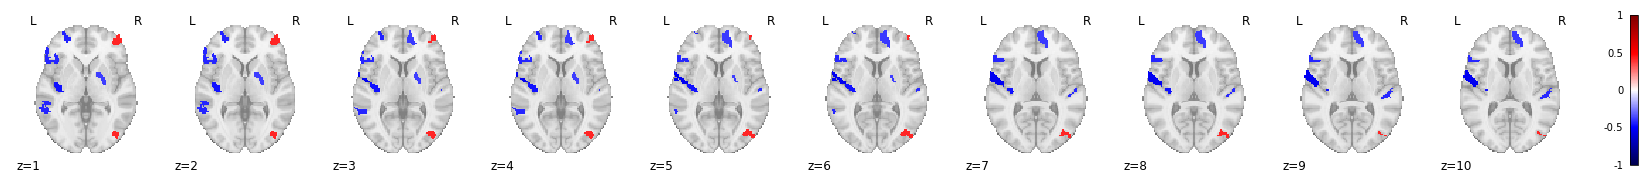

In [449]:
plotting.plot_stat_map(nifti_image, 
                       #threshold=0.01,
                       cut_coords=(1, 2, 3, 4, 5,6,7,8,9,10),\
                       #cut_coords=(11, 12, 13, 14, 15),
                       #cut_coords=7,
                       #draw_cross=False,
                       display_mode="z",
                       vmax=1,#upperbond of the colormap
                       colorbar=True,
                       cmap='seismic',
                       #title="Tranzition zone",
                       )

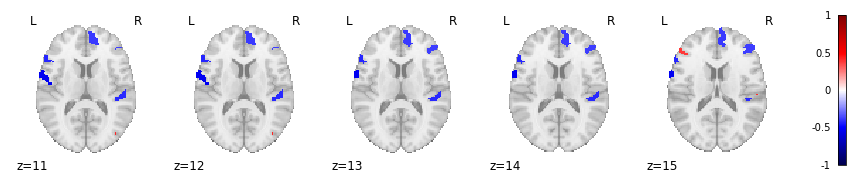

In [450]:
plotting.plot_stat_map(nifti_image, 
                       #threshold=0.01,
                       #cut_coords=(1, 2, 3, 4, 5,6,7,8,9,10),\
                       cut_coords=(11, 12, 13, 14, 15),
                       #cut_coords=7,
                       #draw_cross=False,
                       display_mode="z",
                       vmax=1,#upperbond of the colormap
                       colorbar=True,
                       cmap='seismic',
                       #title="Tranzition zone",
                       )

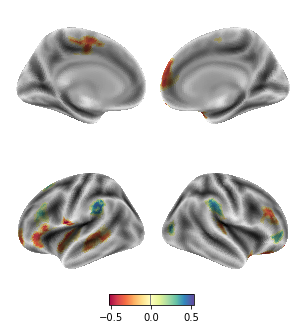

In [463]:
cmap = mpl.cm.plasma # pink - yellow
plotting.plot_img_on_surf(nifti_image, bg_on_data = True, #mask_img = clusters,
                          views=['medial', 'lateral'],
                          hemispheres=['left', 'right'],
                          colorbar=True, cmap = 'Spectral',
                          inflate=True,
                          threshold=0.01,
                          #cut_coords = 5,
                          #title = "Intrinsic neural timescale corr mean response"
                         )


plotting.show()

In [ ]:
fig = plotting.plot_surf_stat_map(
    fsaverage.infl_left, texture, hemi='left',
    #title='Surface left hemisphere, tranzition zone', 
    #colorbar=False,
    threshold=3.1, bg_map=fsaverage.sulc_left,view='lateral',
    vmax=8.3, bg_on_data=True)
    #st, bg_on_data = True,
    #                      views=['lateral', 'medial'],
    #                      hemispheres=['left', 'right'],
     #                     colorbar=True, cmap = cmap

plotting.plot_surf_contours(fsaverage.infl_right, parcellation, labels=labels,
                            levels=regions_indices, figure=fig,
                            legend=True,
                            colors=['g', 'k'])

fig.show()

In [30]:
# choose path and data: functional or resting state
pth = '/home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess'
sub = 'sub-31'

file_name = f'{sub}_task-rest_acq-EPI_space-MNI152NLin2009cAsym_desc-preproc_bold_2mm.nii.gz'

atlas_file = '/home/lisz/Desktop/fmri_atlases/HCPex_2mm_resampled.nii.gz'

example_filename = os.path.join(pth, sub, 'func', file_name)

In [31]:
# open as nib nifti
img_data = nib.load(example_filename)
atlas_HCP = nib.load(atlas_file)

In [32]:
img_data.shape

(97, 116, 98, 180)

In [75]:
header = atlas_HCP.header

space = header.get_best_affine()
resolution = header.get_zooms()
print(space)
print(resolution)
print(atlas_HCP.shape)

[[   2.            0.            0.          -95.97200775]
 [   0.            2.            0.         -132.5       ]
 [   0.            0.            2.          -78.5       ]
 [   0.            0.            0.            1.        ]]
(2.0, 2.0, 2.0)
(97, 116, 98)


In [76]:
header = img_data.header

space = header.get_best_affine()
resolution = header.get_zooms()
print(space)
print(resolution)
print(img_data.shape)

[[   2.            0.            0.          -95.97200775]
 [   0.            2.            0.         -132.5       ]
 [   0.            0.            2.          -78.5       ]
 [   0.            0.            0.            1.        ]]
(2.0, 2.0, 2.0, 2.0)
(97, 116, 98, 180)


In [76]:
# Extract data as a NumPy array
img_data = img.get_fdata()
atlas_HCP = atlas_HCP.get_fdata()

In [77]:
type(img)

nibabel.nifti1.Nifti1Image

In [78]:
# affine transformation applied to the acquired 
# fMRI data during preprocessing
""" it would be the same for any exp with MNI registration? """
# translation, rotation, scaling, and shearing
img.affine.shape

(4, 4)

In [79]:
mid_vol_n = int(img_data.shape[3]/2)
mid_vol_n

90

In [80]:
middle_volume = img_data[:,:,:,mid_vol_n]
# mean intensity within 
# CAUDATE
for i in range(15):
    mean_int = np.mean(middle_volume[atlas_HCP == i])
    print(mean_int)
    
# mean_int = np.mean(middle_volume[test_masks == 100])

print("Mean intensity ", mean_int)

115.05757843141424
664.8125177094972
715.6715421252945
783.1252031685772
814.7383634201509
841.9915085184089
952.7333618164063
835.9831262705277
763.8973391834319
933.8030282429287
921.6873336791992
578.367347080373
725.8327599211112
599.8044998734085
444.4800956394361
Mean intensity  444.4800956394361


## Plot timeseries

In [6]:
# calculate means of each volume inside the brain
# brain region is an integer from the atlas
def calculate_means(brain_region,img_dataset,atlas_name):
    means_of_volumes = []

    timing = int(img_dataset.shape[3])
    for t in range(timing):
        volume = img_dataset[:, :, :, t]# Extract the volume at time point t
        masked_volume = np.mean(volume[atlas_name == brain_region])
        means_of_volumes.append(masked_volume)
    #print(len(means_of_volumes))
    #print(int(img_dataset.shape[3]))
    return means_of_volumes

In [86]:
num_time_points = int(img_data.shape[3])
time_vector = np.arange(num_time_points)
time_vector

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179])

In [87]:
l_caudate = calculate_means(383, img_data, atlas_HCP)
r_caudate = calculate_means(416, img_data, atlas_HCP)

l_putamen = calculate_means(382, img_data, atlas_HCP)
r_putamen = calculate_means(415, img_data, atlas_HCP)

180
180
180
180
180
180
180
180


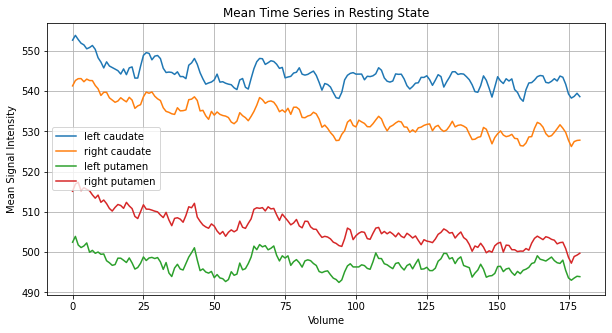

In [88]:
#num_time_points = int(img_data.shape[3])
#resting_state_data = img_data

# Create a time vector 
time_vector = np.arange(num_time_points)

plt.figure(figsize=(10, 5))
plt.plot(time_vector, l_caudate, label='left caudate')
plt.plot(time_vector, r_caudate, label='right caudate')
plt.plot(time_vector, l_putamen, label='left putamen')
plt.plot(time_vector, r_putamen, label='right putamen')
plt.xlabel('Volume')
plt.ylabel('Mean Signal Intensity')
plt.title('Mean Time Series in Resting State')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
# calculate means of each volume OUTSIDE the brain
SD_of_volumes = []
timing = int(img_data.shape[3])
for t in range(timing):

    volume = img_data[:, :, :, t]# Extract the volume at time point t
    masked_volume = np.std(volume[atlas_HCP == 1])
    SD_of_volumes.append(masked_volume)
    
masked_volume

336.69793126600666

The simplest way to investigate similarity between two signals is by looking at their timeseries correlation using Pearson’s correlation coefficient.

"Biswal and colleagues compared task activation maps during finger tapping with a map of correlation coefficients of BOLD data obtained during a scan when the subject was resting. The resting state correlation map was created by taking all voxels that were activated by the motor task and using only the resting state data to calculate the correlation of each voxel in the brain with those “activated” voxels.

Key regions of the DMN are the posterior cingulate cortex, precuneus, medial prefrontal cortex, inferior parietal lobule, and lateral temporal cortex."

## T-test

z-scores - do it with intensity first, then 
participant
roi
z-scores = roi + (1|participant)

make t-test of roi to zero (did for both sides of putamen and caudate, significant)
then i can add behavioral responces 

In [97]:
l_caudate = calculate_means(383, img_data, atlas_HCP)
r_caudate = calculate_means(416, img_data, atlas_HCP)

l_putamen = calculate_means(382, img_data, atlas_HCP)
r_putamen = calculate_means(415, img_data, atlas_HCP)

180
180
180
180
180
180
180
180


In [132]:
from pingouin import ttest
from pymer4.models import Lmer

In [108]:
ttest(r_caudate,0)

/home/lisz/.pyenv/versions/3.6.10/lib/python3.6/site-packages/pingouin/bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df)**(-(df + 1) / 2) / integr)


,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,1803.193724,179,two-sided,0.0,"[532.78, 533.95]",134.402125,inf,1.0


In [126]:
pth = '/home/lisz/Desktop/Time_project/time_fmri/data/derivatives/preprocess'
atlas_file = '/home/lisz/Desktop/fmri_atlases/HCPex_2mm_resampled.nii.gz'
atlas_HCP = nib.load(atlas_file)
atlas_HCP = atlas_HCP.get_fdata()
# Initialize an empty list to store DataFrames for each participant
dfs = []

for sub in sub_list:
    file_name = f'{sub}_task-rest_acq-EPI_space-MNI152NLin2009cAsym_desc-preproc_bold_2mm.nii.gz'
    example_filename = os.path.join(pth, sub, 'func', file_name)
    # open as nib nifti
    img_data = nib.load(example_filename)
    # Extract data as a NumPy array
    img_data = img.get_fdata()
    l_putamen = calculate_means(382, img_data, atlas_HCP)
    r_putamen = calculate_means(415, img_data, atlas_HCP)
    putamen = l_putamen+r_putamen
    
    l_caudate = calculate_means(383, img_data, atlas_HCP)
    r_caudate = calculate_means(416, img_data, atlas_HCP)
    caudate = l_caudate+r_caudate
    
    # Create a temporary DataFrame for the current participant
    temp_df = pd.DataFrame({'putamen': putamen, 'caudate': caudate, 
                            'participant': [sub] * len(putamen)})

    # Append the temporary DataFrame to the list
    dfs.append(temp_df)
    
# Concatenate all DataFrames in the list into one DataFrame
df = pd.concat(dfs, ignore_index=True)

In [139]:
df.to_csv('/home/lisz/Desktop/Time_project/your_file.csv', index=False)